In [16]:
import h5py
import hdf5plugin
import math
import numpy as np
import matplotlib.pyplot as plt


f = h5py.File("../Control2.h5",'r')   
my_spectra = []

number_of_mzs_hist = []
keys = list(f.keys())
for index in range(len(keys)):
        key = keys[index]
        point = [index, len(f.get(key)["x"][:])]
        number_of_mzs_hist.append(point)
        my_spectra.append([f.get(key)["x"][:],f.get(key)["y"][:]])
number_of_mzs_hist = np.array(number_of_mzs_hist)  
print(f"Number of spectra:",len(my_spectra))
print("Done adding to array!")    

Number of spectra: 1657
Done adding to array!


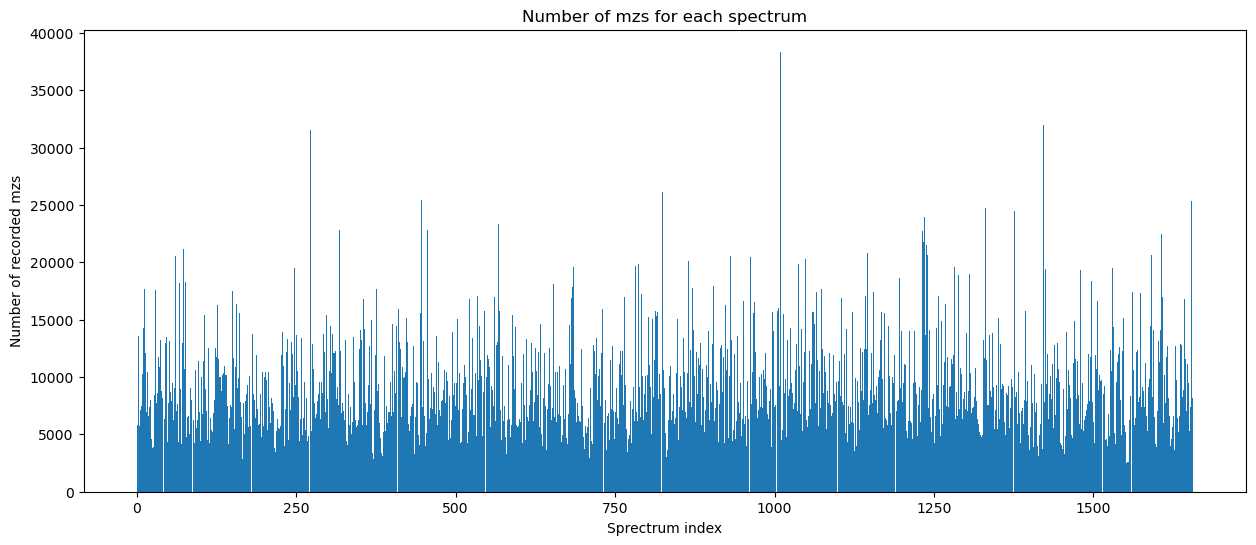

In [32]:
y = number_of_mzs_hist[0:,1]
x = number_of_mzs_hist[0:,0]
# print(x)
plt.figure(figsize=(15, 6))
plt.xlabel("Sprectrum index")
plt.ylabel("Number of recorded mzs")
plt.title("Number of mzs for each spectrum")
plt.bar(x,y,width=1)
plt.show()

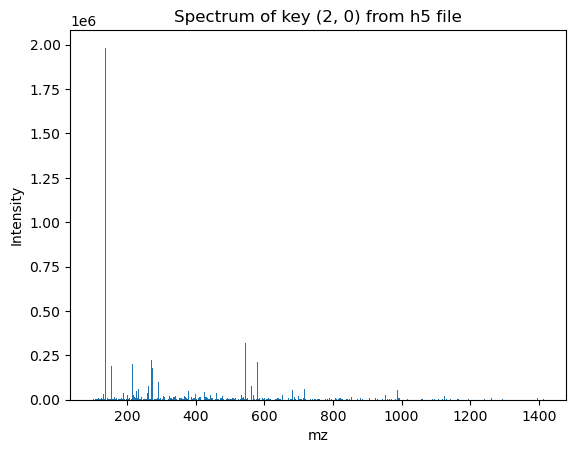

[100.07500828 100.07524566 100.07548304 100.07572042 100.07595779]
[ 1471.37231445  4406.52587891  7685.81152344 10297.22363281
  8413.64355469]


In [ ]:
spectrumx = my_spectra[2]
plt.bar(spectrumx[1],spectrumx[2])
title = "Spectrum of key " + str(spectrumx[0]) + " from h5 file"
plt.title(title)
plt.xlabel("mz")
plt.ylabel("Intensity")
plt.show()

print(spectrumx[1][5:10])
print(spectrumx[2][5:10])



335 90
Points found 29779


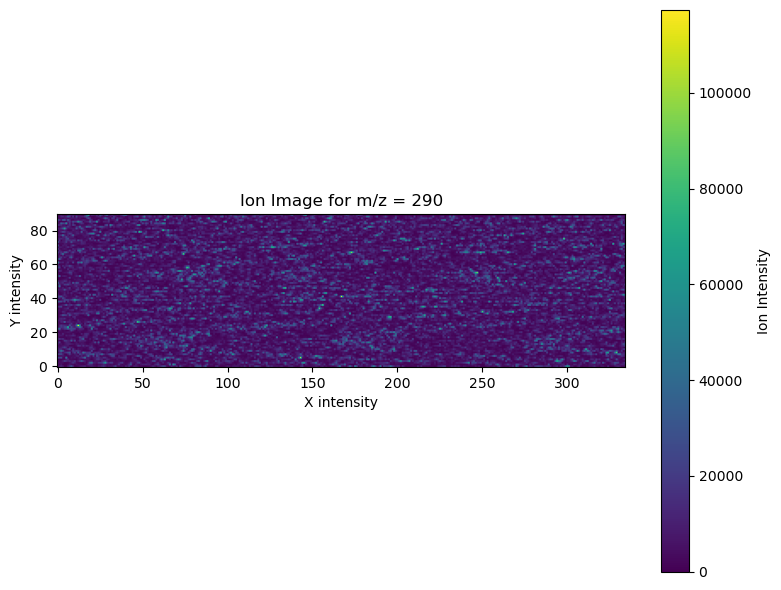

In [5]:
import numpy as np
target_mz = 290
tolerance = 0.1

# Get image dimensions
# all_coords = [(index % 335, index // 335) for index, _, _ in my_spectra]
all_coords = [coord for coord, _,_ in my_spectra]
# print(all_coords)
xs, ys= zip(*all_coords)
width = max(xs) + 1
height = max(ys) + 1
print(width,height)



# Create empty image
ion_image = np.zeros((height, width))

# Fill in the ion image with intensities for target m/z
times = 0 
for (x,y), mzs, intensities in my_spectra:
   
    mz_mask = (mzs >= target_mz - tolerance) & (mzs <= target_mz + tolerance)
    if np.any(mz_mask):
        times+=1
        ion_intensity = np.mean(intensities[mz_mask])
        ion_image[y, x] = ion_intensity
print(f"Points found", times)

# Plot the ion image
plt.figure(figsize=(8, 6))
plt.imshow(ion_image, cmap='viridis', origin='lower')
plt.colorbar(label='Ion Intensity')
plt.title(f"Ion Image for m/z = {target_mz}")
plt.xlabel("X intensity")
plt.ylabel("Y intensity")
plt.tight_layout()
plt.show()

In [ ]:
ion_image[0,0]
